In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)

In [3]:
%%time
hcp_df = pd.read_excel('/kaggle/input/kdsh-data-solution-task-1/HCP_Data_KDAG_Hackathon/HCP_Data_KDAG_Hackathon.xlsx',parse_dates = ["Time_Period"])
patient_df = pd.read_excel('/kaggle/input/kdsh-data-solution-task-1/Patient_Data_KDAG_Hackathon/Patient_Data_KDAG_Hackathon.xlsx',parse_dates = ["Date_of_Visit"])

CPU times: user 3min 16s, sys: 1.1 s, total: 3min 17s
Wall time: 3min 18s


In [4]:
hcp_df.head()

,Physician_ID,Time_Period,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
0,axt00001,2019-01-04,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist
1,axt00001,2019-01-11,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist
2,axt00001,2019-01-18,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist
3,axt00001,2019-01-25,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist
4,axt00001,2019-02-01,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist


In [5]:
hcp_df['Time_Period']=pd.to_datetime(hcp_df['Time_Period'], format='%Y-%m-%d')

In [6]:
hcp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570000 entries, 0 to 569999
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Physician_ID               570000 non-null  object        
 1   Time_Period                570000 non-null  datetime64[ns]
 2   Brand_Rx                   570000 non-null  float64       
 3   Market_Rx                  570000 non-null  float64       
 4   Sales_Rep_Calls            570000 non-null  int64         
 5   Samples_Dropped            570000 non-null  int64         
 6   Physician_Segment          570000 non-null  object        
 7   Emails_Delivered           570000 non-null  int64         
 8   Speaker_Programs_Attended  570000 non-null  int64         
 9   Vouchers_Dropped           570000 non-null  int64         
 10  Specialty                  570000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(3

In [7]:
hcp_df.describe([.25, .50, .75, .90, .98, .99])

,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped
count,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000
mean,0.682828,7.988949,0.391295,0.865719,0.271174,0.005746,0.042044
std,1.369037,10.599537,0.488041,3.437103,0.710370,0.076183,0.448897
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.081410,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.004000,10.910640,1.000000,0.000000,0.000000,0.000000,0.000000
90%,2.037000,19.962490,1.000000,2.000000,1.000000,0.000000,0.000000
98%,4.756000,38.329810,1.000000,12.000000,3.000000,0.000000,0.000000
99%,6.039000,48.118747,1.000000,18.000000,4.000000,0.000000,2.000000


In [8]:
hcp_df.Brand_Rx.dtype == 'float64' or 'int64'

True

In [9]:
obj_col = ['Physician_ID','Physician_Segment','Specialty']
for idx, col in enumerate(obj_col):
    print(f'{col} has {hcp_df[col].nunique()} unique values : {hcp_df[col].unique()}')
#     plt.subplots(1,idx+1)
#     sns.displot(hcp_df[col])

Physician_ID has 10000 unique values : ['axt00001' 'axt00002' 'axt00003' ... 'axt09998' 'axt09999' 'axt10000']
Physician_Segment has 3 unique values : ['3-Low' '1-High' '2-Medium']
Specialty has 3 unique values : ['Dermatologist' 'General Physician' 'Nurse Practitioner']


<Figure size 720x720 with 0 Axes>

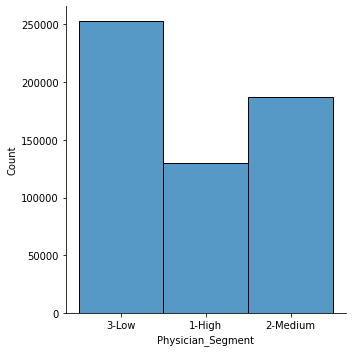

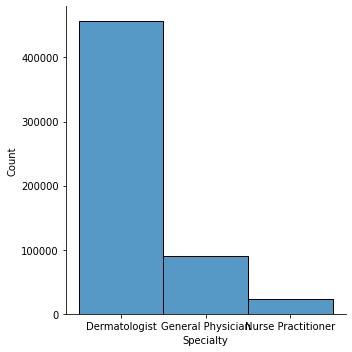

In [10]:
plt.figure(figsize=[10,10])
for idx,col in enumerate(obj_col[1:]):
#     plt.subplot(1, 2, idx+1)
    sns.displot(hcp_df[col])
    plt.show()

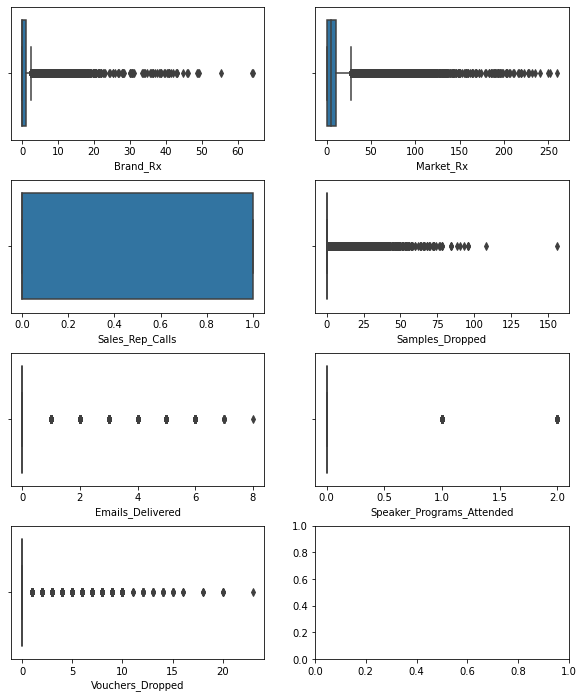

In [11]:
num_columns = ['Brand_Rx','Market_Rx','Sales_Rep_Calls','Samples_Dropped','Emails_Delivered','Speaker_Programs_Attended','Vouchers_Dropped']
# Plot boxplots for each variable
fig, axes = plt.subplots(4, 2, figsize=(10, 12))

for index, col in enumerate(num_columns):
    i, j = divmod(index, 2)
    sns.boxplot(hcp_df[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [12]:
hcp_data = hcp_df.copy()


In [13]:
hcp_data = hcp_data.set_index('Time_Period')
hcp_data.head(100)

,Physician_ID,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
Time_Period,,,,,,,,,,
2019-01-04,axt00001,0.000,2.80567,1,0,3-Low,0,0,0,Dermatologist
2019-01-11,axt00001,0.000,20.57312,1,0,3-Low,0,0,0,Dermatologist
2019-01-18,axt00001,0.000,6.16010,1,0,3-Low,0,0,0,Dermatologist
2019-01-25,axt00001,0.000,8.95501,1,5,3-Low,0,0,0,Dermatologist
2019-02-01,axt00001,0.000,9.13793,1,0,3-Low,0,0,0,Dermatologist
2019-02-08,axt00001,0.841,10.99941,1,9,3-Low,1,0,0,Dermatologist
2019-02-15,axt00001,0.000,2.31340,1,0,3-Low,1,0,0,Dermatologist
2019-02-22,axt00001,0.000,11.97588,0,0,3-Low,0,0,0,Dermatologist
2019-03-01,axt00001,0.000,17.52804,0,0,3-Low,0,0,0,Dermatologist


In [14]:
hcp_data[:57]

,Physician_ID,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
Time_Period,,,,,,,,,,
2019-01-04,axt00001,0.000,2.80567,1,0,3-Low,0,0,0,Dermatologist
2019-01-11,axt00001,0.000,20.57312,1,0,3-Low,0,0,0,Dermatologist
2019-01-18,axt00001,0.000,6.16010,1,0,3-Low,0,0,0,Dermatologist
2019-01-25,axt00001,0.000,8.95501,1,5,3-Low,0,0,0,Dermatologist
2019-02-01,axt00001,0.000,9.13793,1,0,3-Low,0,0,0,Dermatologist
2019-02-08,axt00001,0.841,10.99941,1,9,3-Low,1,0,0,Dermatologist
2019-02-15,axt00001,0.000,2.31340,1,0,3-Low,1,0,0,Dermatologist
2019-02-22,axt00001,0.000,11.97588,0,0,3-Low,0,0,0,Dermatologist
2019-03-01,axt00001,0.000,17.52804,0,0,3-Low,0,0,0,Dermatologist


In [15]:
hcp_data.shape

(570000, 10)

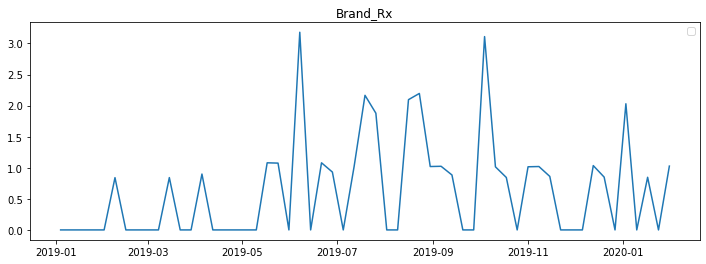

In [16]:
plt.figure(figsize=(12, 4))
# for col in num_columns
plt.plot(hcp_data[:57].Brand_Rx)
plt.legend(loc='best')
plt.title('Brand_Rx')
plt.show(block=False)

In [17]:

j=0
k=0
for i in range(10):
    print(k*57,j+57)
    j=j+57
    k=k+1

0 57
57 114
114 171
171 228
228 285
285 342
342 399
399 456
456 513
513 570


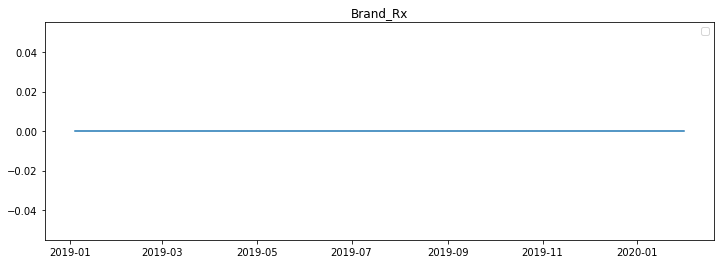

In [18]:

plt.figure(figsize=(12, 4))
# for col in num_columns
plt.plot(hcp_data[57:114].Brand_Rx)
plt.legend(loc='best')
plt.title('Brand_Rx')
plt.show(block=False)

In [19]:
'''j=0
k=0
for i in range(20):
    id1,id2 = k*57,j+57
    plt.figure(figsize=(8,3))
    for col in num_columns:
        
        plt.plot(hcp_data[id1:id2][col],label=col,alpha=0.4)
#         plt.plot(hcp_data[id1:id2].Brand_Rx,label='Brand_Rx',alpha=0.5)
#         plt.plot(hcp_data[id1:id2].Sales_Rep_Calls,label='Sales_Rep_Calls',alpha=0.5)
    plt.legend(loc='best')
    plt.title('Trends')
    plt.savefig(f'Physician_ID {i}.png', bbox_inches='tight')
    plt.show(block=False)
    j=j+57
    k=k+1'''

"j=0\nk=0\nfor i in range(20):\n    id1,id2 = k*57,j+57\n    plt.figure(figsize=(8,3))\n    for col in num_columns:\n        \n        plt.plot(hcp_data[id1:id2][col],label=col,alpha=0.4)\n#         plt.plot(hcp_data[id1:id2].Brand_Rx,label='Brand_Rx',alpha=0.5)\n#         plt.plot(hcp_data[id1:id2].Sales_Rep_Calls,label='Sales_Rep_Calls',alpha=0.5)\n    plt.legend(loc='best')\n    plt.title('Trends')\n    plt.savefig(f'Physician_ID {i}.png', bbox_inches='tight')\n    plt.show(block=False)\n    j=j+57\n    k=k+1"

In [20]:
hcp_data['Physician_Segment'].unique()

array(['3-Low', '1-High', '2-Medium'], dtype=object)

In [21]:
hcp_data = hcp_data.reset_index()
hcp_data.head()


,Time_Period,Physician_ID,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Specialty
0,2019-01-04,axt00001,0.0,2.80567,1,0,3-Low,0,0,0,Dermatologist
1,2019-01-11,axt00001,0.0,20.57312,1,0,3-Low,0,0,0,Dermatologist
2,2019-01-18,axt00001,0.0,6.16010,1,0,3-Low,0,0,0,Dermatologist
3,2019-01-25,axt00001,0.0,8.95501,1,5,3-Low,0,0,0,Dermatologist
4,2019-02-01,axt00001,0.0,9.13793,1,0,3-Low,0,0,0,Dermatologist


In [22]:
print(hcp_data.shape)
print(hcp_data[hcp_data['Sales_Rep_Calls']==1].shape[0])
print(hcp_data[hcp_data['Samples_Dropped']==1].shape[0])
print(hcp_data[hcp_data['Emails_Delivered']==1].shape[0])

(570000, 11)
223038
1539
62227


Sales rep calls in last 12 months (including the promotion week to be optimized for) should not be more than:

48 calls for High Segment HCPs

24 calls for Medium Segment HCPs

12 calls for Low Segment HCPs

In [23]:
high_df = hcp_data[hcp_data['Physician_Segment']=='1-High']
print('Number of Unique Physician ID of High Segment HCPs : {}'.format(high_df['Physician_ID'].nunique()))
print(high_df.shape)
high_unique_id = high_df['Physician_ID'].unique()
for a_id in high_unique_id:
    id_df =  high_df[high_df['Physician_ID']==a_id]
    id_df = id_df[(id_df['Time_Period']> "2019-02-01") & (id_df['Time_Period']< "2020-01-31" ) ]
    rows = [id_df['Sales_Rep_Calls'].sum() > 48]
    if rows is True:
        hcp_data.loc[id_df['Sales_Rep_Calls'].index, 'Sales_Rep_Calls'] = 0
        


Number of Unique Physician ID of High Segment HCPs : 2276
(129732, 11)


In [24]:
medium_df = hcp_data[hcp_data['Physician_Segment']=='2-Medium']
print('Number of Unique Physician ID of Medium Segment HCPs : {}'.format(medium_df['Physician_ID'].nunique()))
print(medium_df.shape)
medium_unique_id =medium_df['Physician_ID'].unique()
for b_id in medium_unique_id:
    id_df =  medium_df[medium_df['Physician_ID']==b_id]
    id_df = id_df[(id_df['Time_Period']> "2019-02-01") & (id_df['Time_Period']< "2020-01-31" ) ]
    rows = [id_df['Sales_Rep_Calls'].sum() > 24]
    if rows is True:
        hcp_data.loc[id_df['Sales_Rep_Calls'].index, 'Sales_Rep_Calls'] = 0
    


Number of Unique Physician ID of Medium Segment HCPs : 3286
(187302, 11)


In [25]:
print(medium_df.shape)

(187302, 11)


In [26]:
low_df = hcp_data[hcp_data['Physician_Segment']=='3-Low']
print('Number of Unique Physician ID of Low Segment HCPs : {}'.format(low_df['Physician_ID'].nunique()))
print(low_df.index)
low_unique_id =low_df['Physician_ID'].unique()
for c_id in low_unique_id:
    id_df =  low_df[low_df['Physician_ID']==c_id]
    id_df = id_df[(id_df['Time_Period']> "2019-02-01") & (id_df['Time_Period']< "2020-01-31" ) ]
    rows = [id_df['Sales_Rep_Calls'].sum() > 12]
    if rows is True:
        hcp_data.loc[id_df['Sales_Rep_Calls'].index, 'Sales_Rep_Calls'] = 0
    


Number of Unique Physician ID of Low Segment HCPs : 4438
Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            569990, 569991, 569992, 569993, 569994, 569995, 569996, 569997,
            569998, 569999],
           dtype='int64', length=252966)


In [27]:
X = hcp_data.drop(columns = ['Speaker_Programs_Attended', 'Vouchers_Dropped','Time_Period'])
X.shape

(570000, 8)

In [28]:
X

,Physician_ID,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Specialty
0,axt00001,0.0,2.80567,1,0,3-Low,0,Dermatologist
1,axt00001,0.0,20.57312,1,0,3-Low,0,Dermatologist
2,axt00001,0.0,6.16010,1,0,3-Low,0,Dermatologist
3,axt00001,0.0,8.95501,1,5,3-Low,0,Dermatologist
4,axt00001,0.0,9.13793,1,0,3-Low,0,Dermatologist
...,...,...,...,...,...,...,...,...
569995,axt10000,0.0,2.45597,0,0,3-Low,1,Dermatologist
569996,axt10000,0.0,2.38065,0,0,3-Low,0,Dermatologist
569997,axt10000,0.0,7.42171,0,0,3-Low,1,Dermatologist
569998,axt10000,0.0,5.39345,0,0,3-Low,1,Dermatologist


In [29]:
X_dummies = pd.get_dummies(X['Specialty'])

# Concatenate the dummy variables with the original DataFrame
X = pd.concat([X, X_dummies], axis=1)

# Drop the original "column" column
X = X.drop(columns=['Specialty'])




In [30]:
X_dummies_2 = pd.get_dummies(X['Physician_Segment'])

# Concatenate the dummy variables with the original DataFrame
X = pd.concat([X, X_dummies_2], axis=1)

# Drop the original "column" column
X = X.drop(columns=['Physician_Segment'])


In [31]:
X

,Physician_ID,Brand_Rx,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Emails_Delivered,Dermatologist,General Physician,Nurse Practitioner,1-High,2-Medium,3-Low
0,axt00001,0.0,2.80567,1,0,0,1,0,0,0,0,1
1,axt00001,0.0,20.57312,1,0,0,1,0,0,0,0,1
2,axt00001,0.0,6.16010,1,0,0,1,0,0,0,0,1
3,axt00001,0.0,8.95501,1,5,0,1,0,0,0,0,1
4,axt00001,0.0,9.13793,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
569995,axt10000,0.0,2.45597,0,0,1,1,0,0,0,0,1
569996,axt10000,0.0,2.38065,0,0,0,1,0,0,0,0,1
569997,axt10000,0.0,7.42171,0,0,1,1,0,0,0,0,1
569998,axt10000,0.0,5.39345,0,0,1,1,0,0,0,0,1


In [32]:
x = X[['Sales_Rep_Calls','Samples_Dropped','Emails_Delivered']]
Y =X[['Brand_Rx','Market_Rx','1-High','2-Medium','3-Low']]
print(x.shape)
print(Y.shape)

(570000, 3)
(570000, 5)


In [33]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Create an RFECV object with the model and 5-fold cross-validation

rfe = RFECV(estimator=model, cv=5)
count = 0
channels = []
for i in range(0,570000,57):


# Fit the RFECV object to the data and select the most important features
    X_phy = x[i:i+57]
    Y_phy = Y[i:i+57]
    rfe.fit(X_phy, Y_phy)

# Get the ranking of the features
    ranking = rfe.ranking_
    
# Print the most important features
    count +=1
    
    #print(ranking)
    for i, column in enumerate(X_phy.columns):
        if ranking[i] == 1:
            
            if column == 'Sales_Rep_Calls':
                channels.append(0)
                break;
            elif column == 'Samples_Dropped' :
                channels.append(1)
                break;
            elif column == 'Emails_Delivered':
                channels.append(2)
                break;
        
                

In [34]:
print((len(channels)))

10000


In [35]:
s = pd.Series(channels)

# Convert the series to a dataframe with a named column
channel_df = s.to_frame(name='Channel')
print(channel_df.shape)
physician_df = pd.DataFrame(hcp_data['Physician_ID'].unique())
physician_df.columns = ['Physician_ID']
submissions_df = pd.concat([physician_df,channel_df],axis =1)
submissions_df

(10000, 1)


,Physician_ID,Channel
0,axt00001,0
1,axt00002,0
2,axt00003,0
3,axt00004,0
4,axt00005,0
...,...,...
9995,axt09996,0
9996,axt09997,0
9997,axt09998,1
9998,axt09999,0


In [36]:
submissions_df.to_csv('file1.csv')